preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (3.3% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


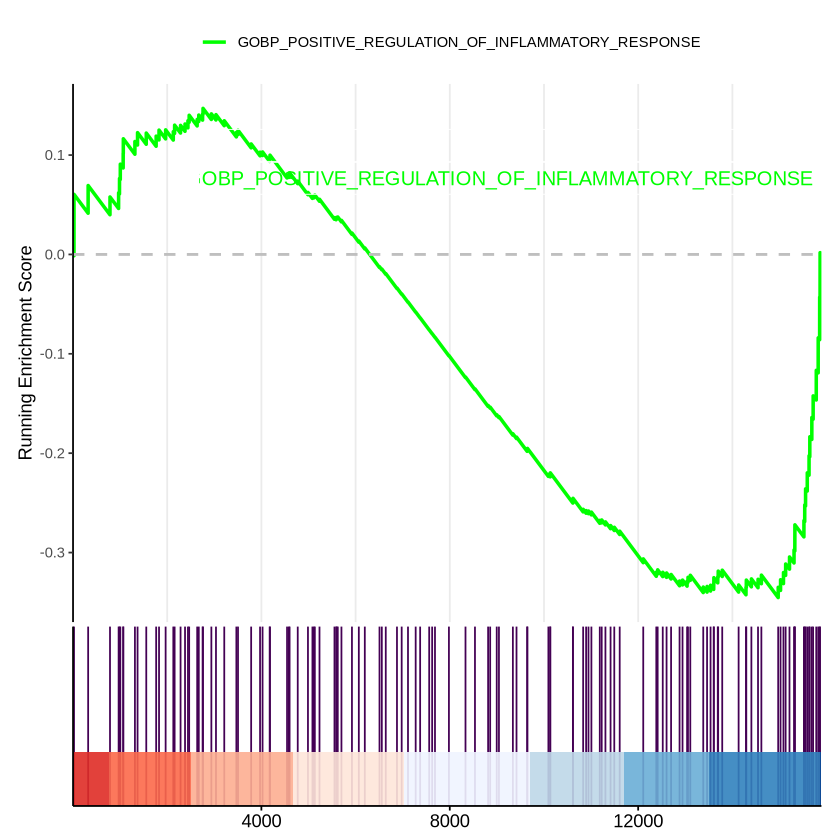

In [94]:
library(enrichplot)
library(clusterProfiler)
library(ggplot2)
library(org.Mm.eg.db)
library(org.Hs.eg.db)
getg=function(rnkpath){
    genes=read.table(rnkpath)
    gene=genes$V2
    names(gene)=genes$V1
    return(gene)
}
gene1=getg('/mnt/dfc_data2/project/yanteng/mouse.aging/AP1_inhibitor/RNA-AP1I/00.4Deg-log2fc/agingSkinTissue.filter.rnk')

pathway1<-read.gmt("/mnt/dfc_data2/project/yanteng/software/GSEA/data/m5.go.bp.v2023.2.Mm.symbols.gmt")

y1 <- GSEA(gene1,TERM2GENE =pathway1,pvalueCutoff = 1)

# all plot
p <- gseaplot2(y1,geneSetID = c('GOBP_POSITIVE_REGULATION_OF_INFLAMMATORY_RESPONSE'),pvalue_table = T,
               subplots = c(1,2))
p[[1]] <- p[[1]]+
  geom_hline(yintercept = 0,color="grey75", linewidth=0.8,linetype=2)+
  theme(legend.position = "top")
p[[2]] <- p[[2]]+scale_color_viridis_d()
#p[[3]] <- p[[3]]+geom_hline(yintercept = 0,color="steelblue", linewidth=0.5,linetype=2)
p


ggsave(paste0('epiSC_AP1I_vs_CTL_up','.GSEA.png'), width=5, height=5)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


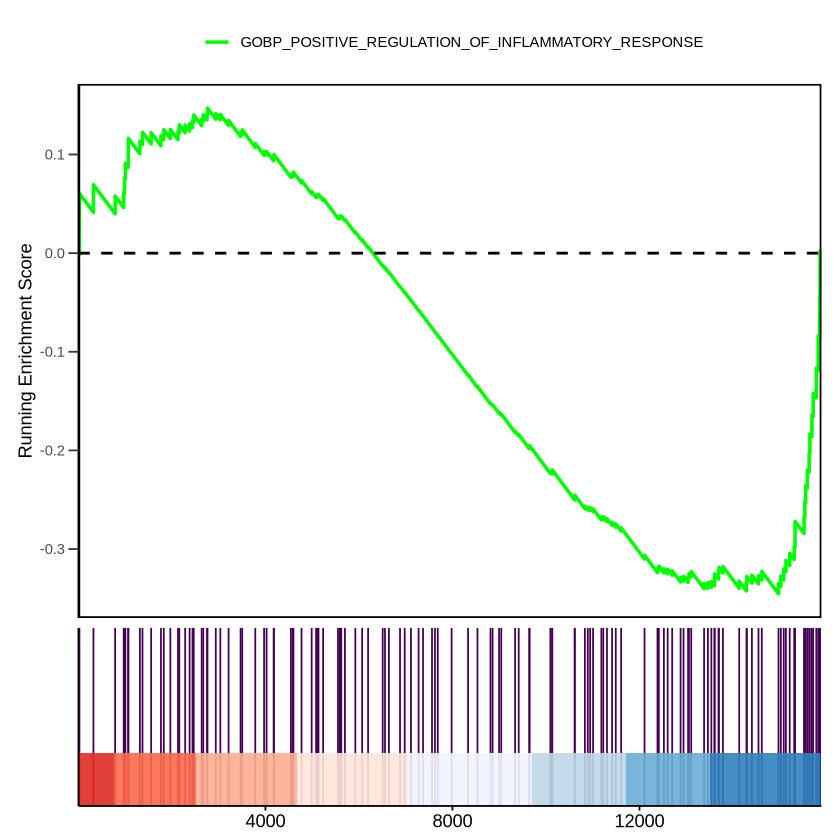

In [88]:
p <- gseaplot2(y1,geneSetID = c('GOBP_POSITIVE_REGULATION_OF_INFLAMMATORY_RESPONSE'),
               subplots = c(1,2))
p[[1]] <- p[[1]]+
  geom_hline(yintercept = 0,color="black", linewidth=0.8,linetype=2)+
  theme(legend.position = "top")+theme(
    panel.border = element_rect(colour = "black", size = 1, fill = NA),  # 添加黑色外框
    panel.background = element_blank(),  # 移除背景填充
    panel.grid.major = element_blank(),  # 移除主网格线
    panel.grid.minor = element_blank(),  # 移除次要网格线
    axis.line = element_line(colour = "black", size = 0.5),  # 添加轴线
      axis.ticks.length = unit(6, "pt")
  )
p[[2]] <- p[[2]]+scale_color_viridis_d()
#p[[3]] <- p[[3]]+geom_hline(yintercept = 0,color="steelblue", linewidth=0.5,linetype=2)
p


ggsave(paste0('epiSC_AP1I_vs_CTL_up','.GSEA.png'), width=8, height=5)